<a href="https://colab.research.google.com/github/JLee823/2023-1st-AI-assisted-drug-discovery-SNU/blob/main/AI_based_drug_discvoery_week2_Molecular_descriptors_fingerprints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RDKit 기초
-----
RDKit은 분자의 물성을 계산하고 분자를 파이썬을 이용해서 변형할 수 있는 파이썬 기반의 cheminformatics library이다. 

small molecule을 기반으로 하는 데이터 처리에는 필수적인 라이브러리라고 할 수 있다. 

RDKit은 간단히 pip 명령어를 이용해서 설치할 수 있다. 

기본적인 RDKit tutorial은 아래 사이트에서 찾을 수 있다.

https://www.rdkit.org/docs/GettingStartedInPython.html

In [1]:
pip install rdkit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## RDKit 을 이용해서 분자 읽어들이기. 
-------

In [2]:
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem.Draw import IPythonConsole # Jupyter notebook에 분자가 바로 표현되게 하려면 이 줄이 필요하다. 

### 1. 여러개의 분자가 들어있는 sdf 파일 포맷읽기
----
**sdmolsupplier**함수는 SDF 파일 포맷 (Mol 포맷)으로 되어 있는 여러개의 분자를 읽는다. 

In [3]:
suppl = Chem.SDMolSupplier("drugs.sdf") # sdmolsupplier 는 SDF 파일 포맷 (Mol 포맷)으로 되어 있는 여러개의 분자를 읽는다. 

In [4]:
type(suppl)

rdkit.Chem.rdmolfiles.SDMolSupplier

sdf 파일 안에 있는 첫번째 분자의 구조식을 확인해보자!

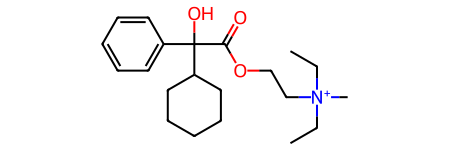

In [5]:
suppl[0]

supplier 안에 몇 개의 분자가 존재하는지 확인해보자. 

In [6]:
len(suppl) #

725

101번째 분자의 구조

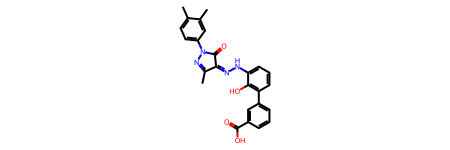

In [7]:
suppl[100]

### 예시 1: 분자를 구성하는 heavy atom의 개수 세기.

In [8]:
for mol in suppl:
    # mol은 분자 정보가 들어가있는 mol class이다. 
    print(mol.GetNumAtoms()) # GetNumAtoms는 mol class의 method이다. 

25
11
13
19
36
10
13
16
21
21
25
26
7
30
23
19
20
10
18
19
17
17
20
17
20
13
15
29
16
31
20
19
16
25
16
20
21
24
10
23
26
44
25
21
9
17
24
16
21
19
21
19
26
18
30
12
23
12
11
14
20
32
16
17
23
13
28
19
26
12
35
20
28
39
13
14
20
25
27
21
23
30
19
16
36
13
13
18
28
24
12
32
34
31
20
17
33
18
20
22
33
24
27
199
28
12
25
22
40
10
34
28
22
30
30
22
10
30
26
14
20
21
24
20
22
27
19
41
18
24
28
43
14
32
29
16
19
29
30
10
36
19
34
22
27
34
31
22
37
35
18
16
33
46
13
18
24
22
21
28
26
22
31
39
19
25
19
32
27
22
15
51
15
20
26
12
9
4
34
22
14
34
31
31
17
35
36
45
24
19
25
39
32
27
29
32
26
21
22
17
23
50
17
41
22
32
33
23
12
11
28
23
17
45
32
21
19
28
25
19
33
35
26
15
30
28
10
15
11
19
16
22
54
22
15
9
15
40
21
13
32
20
21
16
26
18
37
26
19
17
35
31
11
28
31
23
22
65
14
22
32
40
19
22
26
23
22
13
10
28
15
36
21
12
17
46
18
14
22
13
21
27
10
24
27
36
23
22
29
23
16
25
31
16
29
23
32
22
18
24
19
14
20
28
35
65
22
23
14
21
17
27
25
29
30
23
41
37
19
15
29
51
18
19
16
39
31
30
20
14
29
51
27
29
22

### 예제 2: 원자의 개수가 30이상인 큰 분자들만 large_molecules 라는 리스트에 저장. 


In [9]:
large_molecules = [] 
for mol in suppl:
    num_atom = mol.GetNumAtoms()
    if num_atom >= 30:
        large_molecules.append(mol)
print(f"Number of large molecules: {len(large_molecules)}")

Number of large molecules: 181


**큰 분자들의 구조식을 확인해보자.**

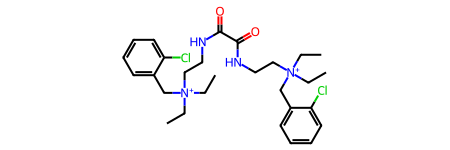

In [10]:
large_molecules[0]

### 예제 2-1: List comprehension을 이용해서 원하는 분자만 골라내기. 

In [11]:
# python에서는 list comprehension 을 제공. 
large_mol2 = [mol for mol in suppl if mol.GetNumAtoms() >=30]

큰 분자의 개수 출력

In [12]:
print(len(large_mol2))

181


In [13]:
type(mol)

rdkit.Chem.rdchem.Mol

이렇게 RDKit에서 분자를 읽어들여서 성공적으로 변환된면 rdkit.Chem.rdchem.Mol 타입의 변수로 저장되게 된다. 

RDKit의 Mol type 변수는 분자의 물성을 뽑아내거나 변형시킬 수 있는 다양한 method들이 이미 구현되어 있다.

### RDKit Mol 문서
-----
https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html#rdkit.Chem.rdchem.Mol

## 분자를 SMILES로 부터 읽어들이기.
-------


In [14]:
m=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')

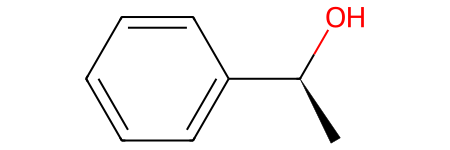

In [15]:
m

여기서 주의할 점은 SMILES로 부터 분자를 읽어들이면 일반적으로 **수소가 붙어있지 않다!**

## SMILES에서 chirality 표시하기.
* @ 는 반시계 방향.
* @@ 는 시계 방향.
* chirality는 필수는 아님. 

In [16]:
m2=Chem.MolFromSmiles('CC(O)c1ccccc1')

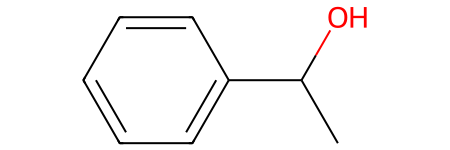

In [17]:
m2

In [18]:
Chem.MolToSmiles(m2)

'CC(O)c1ccccc1'

Aromatic 원자의 경우, 소문자로 표현하는 것이 기본이다. 

그러나 필요에 따라서 Kekule form으로 표현하도록 할 수 있다. 

In [19]:
Chem.MolToSmiles(m2, kekuleSmiles=True)

'CC(O)C1=CC=CC=C1'

In [20]:
m3 = Chem.MolFromSmiles('C1=CC=CN=C1')

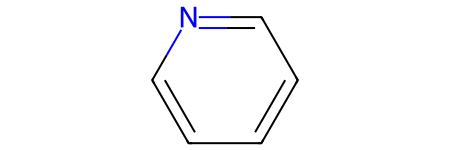

In [21]:
m3

In [22]:
Chem.MolToSmiles(m3)

'c1ccncc1'

In [23]:
Chem.Kekulize(m3) # aromatic bond가 single-double-single-double-... 이런식으로 표현되도록 한다. 

In [24]:
Chem.MolToSmiles(m3, kekuleSmiles=True)

'C1=CC=NC=C1'

## 여러개의 SMILES를 읽어서 mol-type 변수의 리스트로 저장하기
------
많은 경우 여러개의 SMILES들이 하나의 text 파일로 저장되어 있는 경우가 많다. 

이 경우, SMILES들을 순차적으로 읽어들여 리스트에 저장하는 예시를 살펴보자. 


In [25]:
mol_list = []
with open("drugs.smi") as fp:
  for line in fp:
    m = Chem.MolFromSmiles(line)
    mol_list.append(m)

In [26]:
len(mol_list)

725

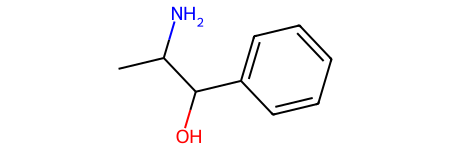

In [27]:
mol_list[1]

## RDKit에서 분자를 여러가지 현태의 파일 포맷으로 출력/저장하기. 
-------


## SMILES로 출력하기. 

기본적으로 aromaticity는 소문자로 나타낸다. 

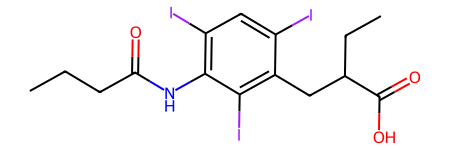

In [28]:
m

In [29]:
Chem.MolToSmiles(m)

'CCCC(=O)Nc1c(I)cc(I)c(CC(CC)C(=O)O)c1I'

In [30]:
Chem.MolToSmiles(m2)

'CC(O)c1ccccc1'

In [31]:
Chem.MolToSmiles(m3)

'c1ccncc1'

### Kekulization
------
single-double-single-... 이런 형태로 SMILES가 출력하도록 함.

In [32]:
Chem.MolToSmiles(m, kekuleSmiles=True, canonical=True) # Canonical SMILES를 출력한다.

'CCCC(=O)NC1=C(I)C=C(I)C(CC(CC)C(=O)O)=C1I'

In [33]:
Chem.MolToSmiles(m3, kekuleSmiles=True)

'C1=CC=NC=C1'

In [34]:
Chem.MolToSmiles(m3, kekuleSmiles=False)

'c1ccncc1'

isomericSmilles = True 이면 chirality 정보를 출력한다. 

In [35]:
Chem.MolToSmiles(m, kekuleSmiles=True, isomericSmiles=True) 

'CCCC(=O)NC1=C(I)C=C(I)C(CC(CC)C(=O)O)=C1I'

isomericSmilles = False 이면 chiraity 정보 무시.  

In [36]:
Chem.MolToSmiles(m, kekuleSmiles=True, isomericSmiles=False) 

'CCCC(=O)NC1=C(I)C=C(I)C(CC(CC)C(=O)O)=C1I'

### MolToSmiles의 모든 옵션은 다음 주소에서 확인할 수 있다. 
https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToSmiles

## 2. 분자를 Mol format (SDF format)으로 출력하기.
------
Chem.MolToMolBlock 함수를 사용. 

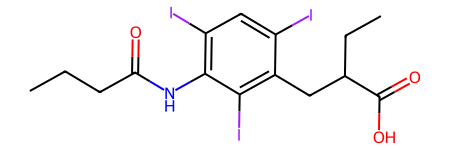

In [37]:
m

In [38]:
print(Chem.MolToMolBlock(m)) # rdkit mol instance를 Mol-format으로 출력. 


     RDKit          2D

 22 22  0  0  0  0  0  0  0  0999 V2000
    7.5000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0000   -2.5981    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.2500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -2.5981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000   -2.5981    0.0000 I   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0000    0.0000    0.0000 I   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    2.5981    0

In [39]:
print(Chem.MolToMolBlock(m2)) # rdkit mol instance를 Mol-format으로 출력. 


     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



In [40]:
print(Chem.MolToMolBlock(m3)) # rdkit mol instance를 Mol-format으로 출력. 


     RDKit          2D

  6  6  0  0  0  0  0  0  0  0999 V2000
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
M  END



파일로 저장하기 위해서는 MolToMolFile 함수를 이용한다. 

https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToMolFile

아래 예시에서는 m3.mol 파일을 생성하고 분자의 정보를 mol format으로 저장한다. 

In [41]:
Chem.MolToMolFile(m3, "m3.mol")

## PDB 파일로 저장하기
------
PDB 포맷으로 저장하기 위해서는 [MolToPDBBlock](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToPDBBlock)과 [MolToPDBFile](https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html#rdkit.Chem.rdmolfiles.MolToPDBFile) 함수를 이용한다. 

In [42]:
print(Chem.MolToPDBBlock(m3))

HETATM    1  C1  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    2  C2  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    3  C3  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    4  C4  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
HETATM    5  N1  UNL     1       0.000   0.000   0.000  1.00  0.00           N  
HETATM    6  C5  UNL     1       0.000   0.000   0.000  1.00  0.00           C  
CONECT    1    2    2    6
CONECT    2    3
CONECT    3    4    4
CONECT    4    5
CONECT    5    6    6
END



위 PDB 포맷에서는 모든 3차원의 좌표가 0.0 으로 되어 있다. 

이를 해결하기 위해서는 **분자의 3차원 구조 정보를 생성해 주어야 한다.**

In [43]:
from rdkit.Chem import AllChem # AllChem module 읽어들이기.
m3 = Chem.AddHs(m3) # 수소 붙이기
AllChem.EmbedMolecule(m3) # 분자의 3차원 구조 생성

0

In [44]:
print(Chem.MolToPDBBlock(m3))

HETATM    1  C1  UNL     1      -1.150   0.519  -0.040  1.00  0.00           C  
HETATM    2  C2  UNL     1       0.071   1.152  -0.024  1.00  0.00           C  
HETATM    3  C3  UNL     1       1.243   0.405   0.022  1.00  0.00           C  
HETATM    4  C4  UNL     1       1.116  -0.966   0.049  1.00  0.00           C  
HETATM    5  N1  UNL     1      -0.096  -1.559   0.032  1.00  0.00           N  
HETATM    6  C5  UNL     1      -1.248  -0.861  -0.012  1.00  0.00           C  
HETATM    7  H1  UNL     1      -2.083   1.098  -0.075  1.00  0.00           H  
HETATM    8  H2  UNL     1       0.108   2.221  -0.046  1.00  0.00           H  
HETATM    9  H3  UNL     1       2.225   0.872   0.036  1.00  0.00           H  
HETATM   10  H4  UNL     1       2.036  -1.550   0.084  1.00  0.00           H  
HETATM   11  H5  UNL     1      -2.222  -1.332  -0.025  1.00  0.00           H  
CONECT    1    2    2    6    7
CONECT    2    3    8
CONECT    3    4    4    9
CONECT    4    5   10
CONECT

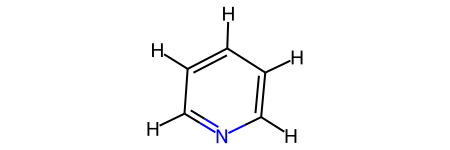

In [45]:
m3

In [46]:
Chem.MolToPDBFile(m3, "m3.pdb")

그 외, RDKit에서는 XYZ format, TPL format, CXSmiles (extended SMILES) 등을 추가로 지원한다!

**주의: RDKit에서는 mol2 파일 포맷은 정식으로 지원하지 않는다!**

Mol2 파일 생성을 위해서는 PDB나 Mol file을 외부 프로그램 (MarvinSketch, Avogadro 또는 openbabel)와 같은 프로그램을 이용해서 변환하는 것이 좋다. 

다만, atom type이 잘 못 되는 경우가 많으므로, 주의를 요함. 

In [47]:
print(Chem.MolToCXSmiles(m3))

[H]c1c([H])c([H])c([H])c([H])n1 |(2.03641,-1.55048,0.0842149;1.11592,-0.966382,0.0487181;1.24345,0.405439,0.021672;2.22491,0.871863,0.0355522;0.0708806,1.15199,-0.0236015;0.107598,2.22129,-0.0462237;-1.15029,0.519117,-0.0397213;-2.08253,1.09844,-0.0754037;-1.24801,-0.860577,-0.0117695;-2.22245,-1.33178,-0.0253786;-0.0958826,-1.55892,0.0319411),atomProp:0.isImplicit.1:3.isImplicit.1:5.isImplicit.1:7.isImplicit.1:9.isImplicit.1|


In [48]:
print(Chem.MolToTPLBlock(m3))

BioCAD format, all rights reserved
Output from RDKit
NAME Unnamed molecule
PROP 7 1
11 11
1 C 0 0.0 -115.029 51.9117 -3.97213 3 2 6 7 U
2 C 0 0.0 7.08806 115.199 -2.36015 3 1 3 8 U
3 C 0 0.0 124.345 40.5439 2.1672 3 2 4 9 U
4 C 0 0.0 111.592 -96.6382 4.87181 3 3 5 10 U
5 N 0 0.0 -9.58826 -155.892 3.19411 2 4 6 U
6 C 0 0.0 -124.801 -86.0577 -1.17695 3 5 1 11 U
7 H 0 0.0 -208.253 109.844 -7.54037 1 1 U
8 H 0 0.0 10.7598 222.129 -4.62237 1 2 U
9 H 0 0.0 222.491 87.1863 3.55522 1 3 U
10 H 0 0.0 203.641 -155.048 8.42149 1 4 U
11 H 0 0.0 -222.245 -133.178 -2.53786 1 6 U
1 1.5 1 2 0 0
2 1.5 2 3 0 0
3 1.5 3 4 0 0
4 1.5 4 5 0 0
5 1.5 5 6 0 0
6 1.5 6 1 0 0
7 1.0 1 7 0 0
8 1.0 2 8 0 0
9 1.0 3 9 0 0
10 1.0 4 10 0 0
11 1.0 6 11 0 0
CONFS 0



[05:09:31] Molecule has no name; arbitrary name assigned.


In [49]:
print(Chem.MolToXYZBlock(m3))

11

C     -1.150291    0.519117   -0.039721
C      0.070881    1.151994   -0.023601
C      1.243445    0.405439    0.021672
C      1.115921   -0.966382    0.048718
N     -0.095883   -1.558922    0.031941
C     -1.248005   -0.860577   -0.011770
H     -2.082535    1.098436   -0.075404
H      0.107598    2.221292   -0.046224
H      2.224910    0.871863    0.035552
H      2.036406   -1.550480    0.084215
H     -2.222448   -1.331780   -0.025379



## 수소 붙이기
-------
SMILES에서 분자를 읽어들이면 기본적으로 수소가 생략되어 있다. 

m3에 수소가 없으므로 수소를 붙여보자!

수소를 붙이는 함수는 Chem.AddHs(mol) 이다. 


In [50]:
m3_with_H = Chem.AddHs(m3) 

**새로운 변수를 리턴**한다는 점을 주의하자!

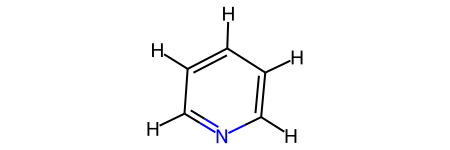

In [51]:
m3_with_H

In [52]:
print(Chem.MolToMolBlock(m3_with_H))


     RDKit          3D

 11 11  0  0  0  0  0  0  0  0999 V2000
   -1.1503    0.5191   -0.0397 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0709    1.1520   -0.0236 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2434    0.4054    0.0217 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1159   -0.9664    0.0487 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0959   -1.5589    0.0319 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2480   -0.8606   -0.0118 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0825    1.0984   -0.0754 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1076    2.2213   -0.0462 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2249    0.8719    0.0356 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0364   -1.5505    0.0842 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2224   -1.3318   -0.0254 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1  0
  2  8  1  0
  3  9  1  0
  4 10  1  0
  6 11  1  0
M  END



In [53]:
print(Chem.MolToMolBlock(m3))


     RDKit          3D

 11 11  0  0  0  0  0  0  0  0999 V2000
   -1.1503    0.5191   -0.0397 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0709    1.1520   -0.0236 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2434    0.4054    0.0217 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.1159   -0.9664    0.0487 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0959   -1.5589    0.0319 N   0  0  0  0  0  0  0  0  0  0  0  0
   -1.2480   -0.8606   -0.0118 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0825    1.0984   -0.0754 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1076    2.2213   -0.0462 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.2249    0.8719    0.0356 H   0  0  0  0  0  0  0  0  0  0  0  0
    2.0364   -1.5505    0.0842 H   0  0  0  0  0  0  0  0  0  0  0  0
   -2.2224   -1.3318   -0.0254 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  2  0
  2  3  1  0
  3  4  2  0
  4  5  1  0
  5  6  2  0
  6  1  1  0
  1  7  1  0
  2  8  1  0
  3  9  1  0
  4 10  1  0
  6 11  1  0
M  END



In [54]:
m2_with_H = Chem.AddHs(m2)

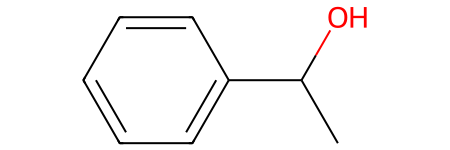

In [55]:
m2

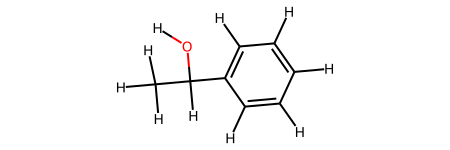

In [56]:
m2_with_H

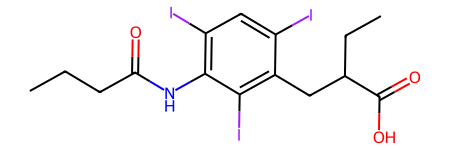

In [57]:
m

In [58]:
m_with_H = Chem.AddHs(m)

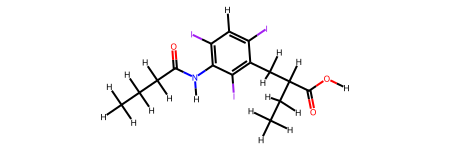

In [59]:
m_with_H

In [60]:
m4 = large_mol2[-1]

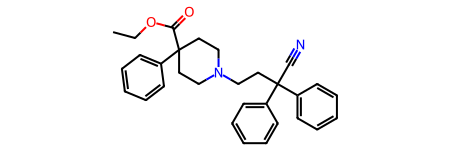

In [61]:
m4

In [62]:
m4_with_H = Chem.AddHs(m4)

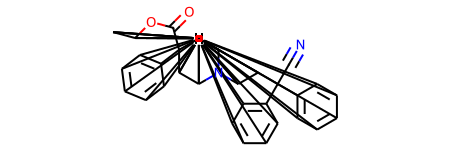

In [63]:
m4_with_H

In [64]:
print(Chem.MolToMolBlock(m4_with_H))


     RDKit          2D

 66 69  0  0  0  0  0  0  0  0999 V2000
   -3.7638    0.2765    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7979    0.0176    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.0908    0.7247    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1248    0.4659    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4177    1.1730    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8660   -0.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6594   -1.1088    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5833   -0.7261    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3766   -1.3348    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.2461   -2.3263    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.3222   -2.7090    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5289   -2.1002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8660   -1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000   -2.0000    0

분자가 복잡할 경우, 수소의 좌표가 이상하게 붙는 경우들이 존재한다. 

이럴 경우, 수소의 좌표를 다시 계산해주어야 한다. 

AllChem.Compute2DCoords 함수를 사용하여야 한다. 

Chem과 AllChem의 차이점은 아래 문서를 참고. 


https://www.rdkit.org/docs/GettingStartedInPython.html#chem-vs-allchem 

In [65]:
from rdkit.Chem import AllChem # AllChem module 읽어들이기.

AllChem.Compute2DCoords(m4_with_H) # m4_with_H 그 자체에서 좌표가 계산되어서 저장되었음. 

0

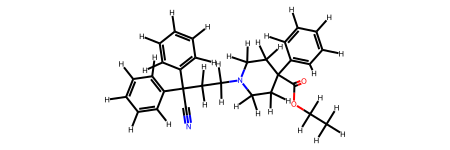

In [66]:
m4_with_H

In [67]:
print(Chem.MolToMolBlock(m4_with_H))


     RDKit          2D

 66 69  0  0  0  0  0  0  0  0999 V2000
    7.2087   -3.7193    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.9323   -2.9313    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.6560   -2.1433    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    4.7003   -0.6439    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.4430   -0.3543    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.4240    0.1441    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.4217    1.2642    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    5.8906    0.9602    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.8882    2.0803    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.4171    3.5044    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.9482    3.8084    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9505    2.6883    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4942    1.3212    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0099    1.1044    0

### 3차원 좌표에 관해
---------

**주의:** 모든 z 축이 0으로 설정되어 있다. 

기본적으로 그림으로 표현된 분자식 기반의 좌표를 저장하고 있기 때문에 2차원으로 표현되어 있음. 

3차원 구조를 얻어내기 위해서는 추가적인 계산이 필요함. 

하지만 분자가 커질수록 최소 에너지를 가지는 분자의 3차원 구조를 찾는 것이 쉽지 않다.

근사적으로 3^(Number of rotatable bonds) 개수만큼 3D 구조가 가능하다. 

그 중에서 에너지가 가장 낮은 것을 찾는 것은 쉽지 않다. 

그래서 rdkit에서는 약간의 가정과 근사를 써서 3D 구조를 만들어낸다. 

In [68]:
AllChem.EmbedMolecule(m4_with_H) # 분자 클래스 자체를 변형시킨다. 

0

분자 구조를 출력해보자. 

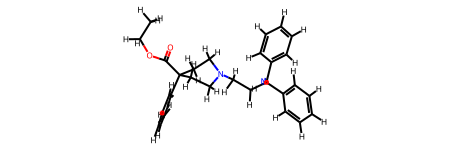

In [69]:
m4_with_H

### Force-field를 이용한 분자의 3차원 구조 최적화 
------
분자의 3차원 구조를 한 번 더 최적화 하기 위해서는 아래의 AllChem.MMFFOptimizeMolecule 함수를 사용한다. 

In [70]:
AllChem.MMFFOptimizeMolecule(m4_with_H)

1

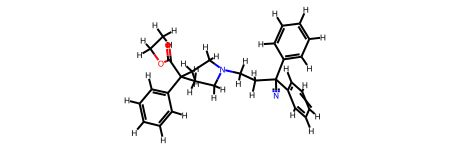

In [71]:
m4_with_H

## 3D 구조 표현에서 2D 구조로 바꾸기
--------


In [72]:
AllChem.Compute2DCoords(m4_with_H)

0

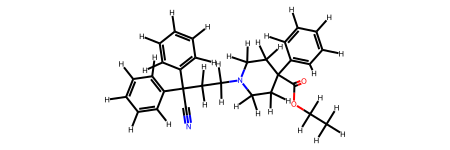

In [73]:
m4_with_H

## 수소 지우기
------
Chem.RemoveHs 함수를 사용.

In [74]:
m4_noH = Chem.RemoveHs(m4_with_H)

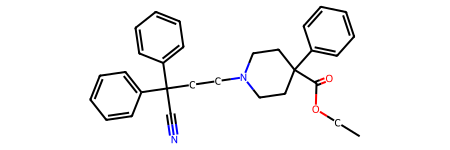

In [75]:
m4_noH

In [76]:
AllChem.Compute2DCoords(m4_noH)

0

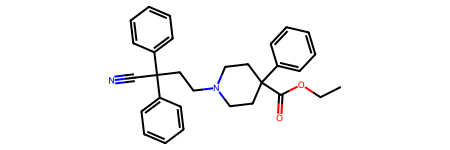

In [77]:
m4_noH

# Fingerprint 계산
-------

In [78]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')

In [79]:
print(m1)

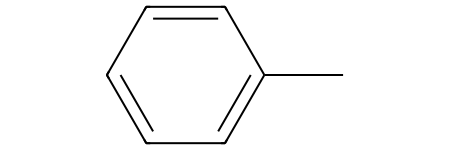

In [80]:
m1

## Extended Fingerprint (ECFP) 계산
------


ECFP 계산의 경우, 몇 개의 공유 결합까지 허용하는 fragment를 만들 것인지를 정해주어야 함. 

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html#rdkit.Chem.rdMolDescriptors.GetMorganFingerprint

일단 공유 결합 반경을 2로 설정해보자. 

즉 ECFP4 fingerprint를 생성해보자. 

In [81]:
fp1 = AllChem.GetMorganFingerprint(m1, 2) # radius = 2, diameter = 4 이므로 ECFP4 에 해당. 

기본적으로 Morgan fingerprints, ECFP는 fragment의 개수를 정보를 기본으로 사용한다. 


In [82]:
print(fp1)

SpartseIntVect 타입으로 저장된다. 

In [83]:
fp1

IntSparseIntVect 타입 변수는 어떤 method가 사용 가능한지 확인해보자. 

In [84]:
dir(fp1)

['GetLength',
 'GetNonzeroElements',
 'GetTotalVal',
 'ToBinary',
 'ToList',
 'UpdateFromSequence',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__getstate__',
 '__getstate_manages_dict__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

기본적으로 Morgan fingerprints, ECFP는 fragment의 개수를 정보를 기본으로 사용한다. 

어떤 molecular fragment가 몇 번 관찰되는지 다음과 같이 출력할 수 있다. 

In [85]:
fp1.GetNonzeroElements()

{98513984: 3,
 422715066: 1,
 908339072: 1,
 951226070: 2,
 2246728737: 1,
 2763854213: 1,
 3207567135: 1,
 3217380708: 1,
 3218693969: 5,
 3999906991: 2,
 4244175903: 2}

### Morgan Fingerprint as a bit vector
------

0과 1의 조합으로 나타내어 보자. 

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html#rdkit.Chem.rdMolDescriptors.GetMorganFingerprintAsBitVect

In [86]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1, 2, nBits=1024) # radius = 2, bit = 1024. 

얻어지는 결과물은 ExplicitBitVect 타입의 변수이다. 

In [87]:
print(fp1)

어떤 method가 사용 가능한지 확인. 

In [88]:
dir(fp1)

['FromBase64',
 'GetBit',
 'GetNumBits',
 'GetNumOffBits',
 'GetNumOnBits',
 'GetOnBits',
 'SetBit',
 'SetBitsFromList',
 'ToBase64',
 'ToBinary',
 'ToBitString',
 'ToList',
 'UnSetBit',
 'UnSetBitsFromList',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__getstate__',
 '__getstate_manages_dict__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__invert__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__']

In [89]:
fp1.ToBitString()

'000000000000000000000000000000010100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

위와 같이 1024개의 bit로 표현 가능하다.

## 분자 사이의 유사도 계산
-----

이제 fingerprint를 이용하여 분자 사이의 유사도 계산을 진행하는 방법을 알아보자. 

In [90]:
from rdkit import Chem

In [91]:
molecules = []
for smi in open("drugs.smi").readlines():
    m = Chem.MolFromSmiles(smi)
    molecules.append(m)

In [92]:
print(len(molecules))

725


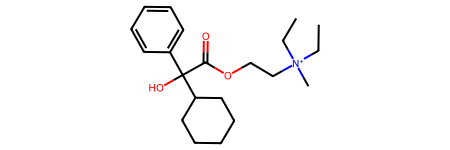

In [93]:
molecules[0]

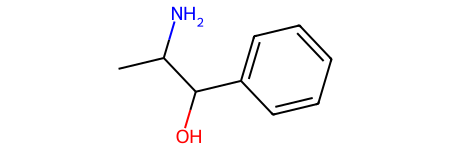

In [94]:
molecules[1]

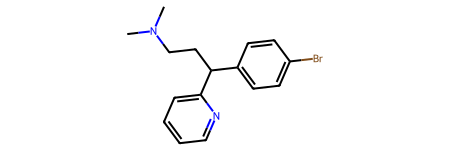

In [95]:
molecules[3]

In [96]:
m1 = molecules[0]
m2 = molecules[1]

분자들을 모두 Mol 타입의 변수로 성공적으로 변환시켰다!

이제 모든 분자들을 ECFP로 변환한 후 리스트에 저장해보자. 

In [97]:
from rdkit.Chem import AllChem

In [98]:
fps = [] # fingerprint를 저장할 빈 리스트. 
for m in molecules:
  fps.append(AllChem.GetMorganFingerprint(m, 2)) # ECFP4 생성

In [99]:
fp1 = fps[0]

In [100]:
fp2 = fps[1]

In [101]:
print(fp1)

In [102]:
print(fp2)

In [103]:
dir(fp1)

['GetLength',
 'GetNonzeroElements',
 'GetTotalVal',
 'ToBinary',
 'ToList',
 'UpdateFromSequence',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__getstate__',
 '__getstate_manages_dict__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__idiv__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__isub__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__']

In [104]:
fp1.GetNonzeroElements() # 0이 아닌 정수리스트를 확인. 

{98513984: 3,
 171200514: 1,
 256204769: 2,
 555182196: 2,
 569172881: 1,
 586114558: 1,
 708322256: 2,
 847698334: 1,
 864662311: 1,
 864674487: 1,
 864942730: 1,
 951226070: 2,
 1107800863: 2,
 1254592940: 1,
 1491231198: 1,
 1510328189: 1,
 1542631284: 1,
 1866871746: 1,
 2117068077: 2,
 2142032900: 3,
 2222715027: 1,
 2245277810: 1,
 2245384272: 4,
 2246699815: 1,
 2246728737: 3,
 2317493814: 1,
 2567005256: 1,
 2623268129: 1,
 2763854213: 1,
 2832976762: 2,
 2968968094: 5,
 2976033787: 1,
 3217380708: 1,
 3218693969: 5,
 3465924759: 1,
 3542456614: 2,
 3824347764: 1,
 3879959393: 1,
 3933537673: 1,
 3962647772: 1,
 3999906991: 2,
 4008337421: 1,
 4038637638: 1,
 4075772858: 1}

In [105]:
fp_bits = []
for m in molecules:
  fp_bits.append(AllChem.GetMorganFingerprintAsBitVect(m, 2, nBits=1024))# 1024개의 0/1로 표현해라. 

In [106]:
fp1_bit = fp_bits[0]

In [107]:
type(fp1_bit)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

In [108]:
fp2_bit = fp_bits[1]

In [109]:
dir(fp1_bit)

['FromBase64',
 'GetBit',
 'GetNumBits',
 'GetNumOffBits',
 'GetNumOnBits',
 'GetOnBits',
 'SetBit',
 'SetBitsFromList',
 'ToBase64',
 'ToBinary',
 'ToBitString',
 'ToList',
 'UnSetBit',
 'UnSetBitsFromList',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__getitem__',
 '__getstate__',
 '__getstate_manages_dict__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__init__',
 '__init_subclass__',
 '__instance_size__',
 '__invert__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__safe_for_unpickling__',
 '__setattr__',
 '__setitem__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '__xor__']

In [110]:
fp1_str = fp1_bit.ToBitString() # 0과 1로 이루어진 문자열로 출력!

In [111]:
fp1_str

'001010000000010000000000000000000100000000000000000000000000000010000010100000001000000000000000000000000000000000101000000000000000000000000000000100010000000000000000000000010000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000010000100000010000000000000000000000000000000000000000000000000000001000000000000000000000000000000001000100000000000000000000100000000000001000000000000000000000000000000000000000000000000010000000000000000000000000000000100000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000010000000000000000000001000000000000000000000000000000000000000000001000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000000000000000010000000100000000000000000000000000000000000000000100000000000000010000000000000000001000001001000000000000000000010000000000001000000000000000000000000000100000001000000000000010000000000000000100000

In [112]:
len(fp1_str)

1024

In [113]:
fp2_str = fp2_bit.ToBitString()

In [114]:
fp2_str

'010000000000000000000000000000000100000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000010000000000000000000000000000000000000000000010000001000000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000001000000000000001000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000100000000000000000000000000000000000000000000000000000000000100000000000000000000100000000000000000000000000000000000000000100000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000100000000000000000000000000000000

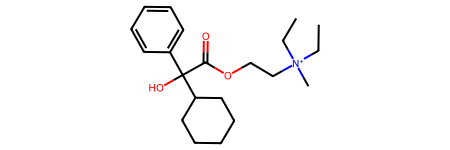

In [115]:
m1

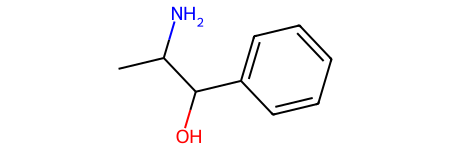

In [116]:
m2

# 분자들 사이의 유사도 (similarity) 계산
-------

https://www.rdkit.org/docs/source/rdkit.DataStructs.html

분자들 사이의 유사도를 계산하는 방법에는 크게 두가지의 방법이 가장 많이 사용된다. 
1. Tanimoto similarity (Jaccard Index)
* https://en.wikipedia.org/wiki/Jaccard_index

2. Dice similarity
* https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient

In [117]:
# Similarity 계산을 위해서 Datastructs 모듈을 읽어들임.
from rdkit import DataStructs 

### Tanimoto similarity
-----
![picture](https://miro.medium.com/max/1200/0*LtCn9l019IeLViyP)

![picture](https://images.deepai.org/glossary-terms/jaccard-index-9707615.jpg)

Tanimoto similarity는 간단히 말해 교집합의 개수를 합집합의 개수로 나눈 것을 의미한다. 

이는 rdkit.DataStructs.FingerprintSimilarity 와 rdkit.DataStructs.TanimotoSimilarity 두 가지의 함수를 이용해서 계산할 수 있다. 

**주의: Morgan Fingerprint는 rdkit.DataStructs.FingerprintSimilarity를 이용해서 계산이 되지 않는다.** 

FingerprintSimilarity를 사용하기 위해서는 GetMorganFingerprintAsBitVect 함수를 이용해서 bit vector로 표현해야 한다. 

In [118]:
# Tanimoto Coefficient 계산: DataStructs.FingerprintSimilarity, DataStructs.TanimotoSimilarity

In [119]:
DataStructs.FingerprintSimilarity(fp1_bit, fp2_bit) # 0/1로 되어있는 fingerprint를 사용. 

0.18867924528301888

아래 계산은 error가 난다. 

왜냐하면, fp1과 fp2가 SparseIntVect 타입이기 때문이다. 

In [126]:
DataStructs.FingerprintSimilarity(fp1, fp2)

AttributeError: ignored

DataStructs.FingerprintSimilarity함수의 결과 값과 DataStructs.TanimotoSimilarity의 값은 위의 유사도 값과 동일하다. 

즉, FingerprintSimilarity의 기본 계산 방법은 TanimotoSimilarity로 셋팅되어 있다. 

In [125]:
DataStructs.TanimotoSimilarity(fp1_bit, fp2_bit)

0.18867924528301888

In [ ]:
#임의의 두개의 bit vector (0/1로 이루어진)에서 합집합: 둘 중에 하나라도 1인 경우에 1로 표현. 

In [ ]:
#임의의 두개의 bit vector (0/1로 이루어진)에서 교집합 (interaction): 둘 다 1인 경우에 1로 표현. 

### Dice simillarity
--------

![picture](https://wikimedia.org/api/rest_v1/media/math/render/svg/a80a97215e1afc0b222e604af1b2099dc9363d3b)

Dice similarity는 Sørensen–Dice coefficient이라고도 불린다. 

https://en.wikipedia.org/wiki/S%C3%B8rensen%E2%80%93Dice_coefficient

하나의 주의할 점은 Dice similarity는 Triangular inequality를 만족하지 않는다. 

TanimotoSimilarity와 달리 DiceSimliarity를 이용하면 SparseInt형태와 bitvector형태를 모두 다룰 수 있다. 


In [127]:
DataStructs.DiceSimilarity(fp1, fp2) # fp1과 fp2 사이의 Dice similarity 비교. 

0.32

## 예제 3: drugs.smi 파일에서 첫번째 분자와 유사도 0.4 이상인 분자들을 찾아보자. 
---------


In [128]:
from tqdm import tqdm
fp1 = fps[0] # 첫번째 분자의 fingerprint
for idx, fp in tqdm(enumerate(fps[1:])):
  sim = DataStructs.TanimotoSimilarity(fp, fp1)
  if sim > 0.4:
    smiles = Chem.MolToSmiles(molecules[idx+1])
    print(f"\nIndex: {idx}\t{smiles} is highly similar to the first molecule: Tc = {sim:.3f}")

724it [00:00, 112079.28it/s]


Index: 13	C[N+]1(C)CCN(CC(O)(c2ccccc2)C2CCCCC2)CC1 is highly similar to the first molecule: Tc = 0.417

Index: 32	CN1CCCN=C1COC(=O)C(O)(c1ccccc1)C1CCCCC1 is highly similar to the first molecule: Tc = 0.543

Index: 49	OC(CCN1CCCCC1)(c1ccccc1)C1CCCC1 is highly similar to the first molecule: Tc = 0.419

Index: 288	C[N+]1(C)CCC(OC(=O)C(O)(c2ccccc2)C2CCCC2)C1 is highly similar to the first molecule: Tc = 0.517

Index: 370	CC[N+](CC)(CC)CCC(O)(c1ccccc1)C1CCCCC1 is highly similar to the first molecule: Tc = 0.588

Index: 652	CCN(CC)CC#CCOC(=O)C(O)(c1ccccc1)C1CCCCC1 is highly similar to the first molecule: Tc = 0.636


# Molecular Descriptors
------


## RDKit을 이용한 계산
-----
분자를 수치화 할 때, 분자의 **물리화학적 물성** 및 **위상기하적**인 다양한 수치들을 계산하여 사용할 수 있다. 

이를 molecular descriptor라고 하며 fingerprint와 동시에 화학정보학에서 많이 사용되고 있는 방법이다. 

RDKit에서도 다양한 descriptor 계산 함수를 지원하고 있으며, 외부 package들도 다수 존재한다. 

RDKit에서 기본으로 제공하는 Descriptor들은 [Chem.Descriptors](https://www.rdkit.org/docs/source/rdkit.Chem.Descriptors.html#module-rdkit.Chem.Descriptors) 에서 리스트를 확인할 수 있다. 

https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors

또한 추가적으로 다음의 모듈, Chem.rdMolDescriptors에서도 descriptor 계산 함수를 지원한다. 

[Chem.rdMolDescriptors](https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html)

In [131]:
from rdkit.Chem import Descriptors
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')

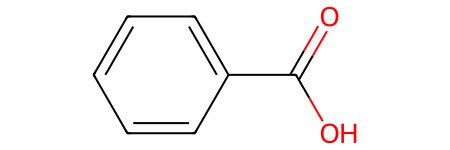

In [133]:
m

Total polar surface area (TPSA)를 계산해보자. (Angstrom^2 단위) 

In [134]:
Descriptors.TPSA(m)

37.3

분자의 logP 값을 계산해보자. 

logP 값은 octanol partition coefficient 이며 분자의 hydrophobicity의 척도이다. 

물과 octanol에 특정 compound를 동시에 녹였을 때, 각 용매에 분배되는 비율을 표시한 값이다. 

즉, logP가 높을 수록, octanol에 compound가 많이 녹아있다는 것을 의미하며, hydrophobic하다는 뜻이다. 

https://en.wikipedia.org/wiki/Partition_coefficient

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Separatory_funnel_with_oil_and_colored_water.jpg/340px-Separatory_funnel_with_oil_and_colored_water.jpg">

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/2d969a26d0a4a0f8ee87b1d7575ede1a6bf44fcd">

일반적으로 대부분의 경구 투여 약물의 경우 0~5 사이의 logP 값을 가지는 것으로 알려져있다. 

<img src="https://www.researchgate.net/publication/258883951/figure/fig3/AS:667834032074757@1536235449985/Histogram-of-logP-values-of-DrugBank-drugs-columns-fitted-with-normal-distribution-red.png">

In [135]:
Descriptors.MolLogP(m)
1.3848

1.3848

부분 전하는 각 원자 별로 계산되어야 하므로 조금 다르게 계산된다. 

In [136]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
AllChem.ComputeGasteigerCharges(m) # 가장 많이 사용되는 부분 전하 계산 방법, GasteigerCharge
m.GetAtomWithIdx(0).GetDoubleProp('_GasteigerCharge')

-0.04769375004654255

### 각 descriptor의 contribution을 계산 및 시각화
-------
몇몇 descriptor의 경우, contribution 계산 후 시각화가 가능하다. 


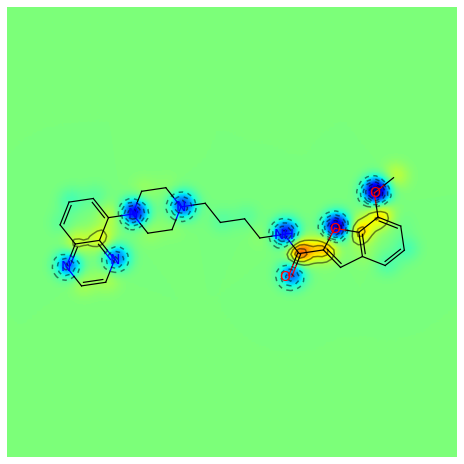

In [138]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol) # 부분전하 계산
contribs = [mol.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(mol.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

높은 값을 가지는 원자는 빨간색을 띄고, 낮은 값을 가지는 원자는 파란색으로 표현된다. 

logP의 기여도를 시각화 해보자. 

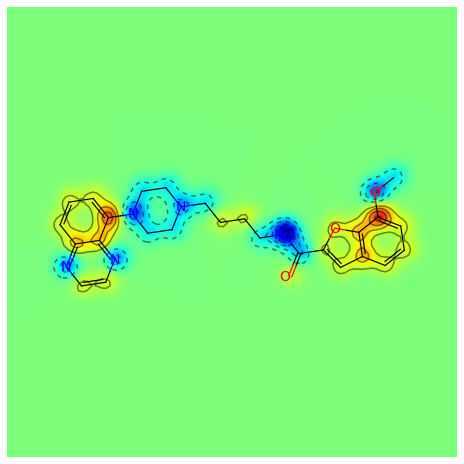

In [139]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

### RDKit을 이용한 195가지의 descriptor 계산
-------

RDKit에서 제공하는 다양한 분자 descriptor 계산 함수를 이용해서 195개의 descriptor 값을 계산해보자. 

In [254]:
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors
from rdkit import DataStructs
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.GraphDescriptors import (BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1,
                                         Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v,
                                         HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3)
from rdkit.Chem.EState.EState_VSA import (EState_VSA1, EState_VSA10, EState_VSA11, EState_VSA2, EState_VSA3,
                                          EState_VSA4, EState_VSA5, EState_VSA6, EState_VSA7, EState_VSA8, EState_VSA9,
                                          VSA_EState1, VSA_EState10, VSA_EState2, VSA_EState3, VSA_EState4, VSA_EState5,
                                          VSA_EState6, VSA_EState7, VSA_EState8, VSA_EState9,)
from rdkit.Chem.Descriptors import (ExactMolWt, MolWt, HeavyAtomMolWt, MaxAbsPartialCharge, MinPartialCharge,
                                    MaxPartialCharge, MinAbsPartialCharge, NumRadicalElectrons, NumValenceElectrons)
from rdkit.Chem.EState.EState import (MaxAbsEStateIndex, MaxEStateIndex, MinAbsEStateIndex, MinEStateIndex,)
from rdkit.Chem.Lipinski import (FractionCSP3, HeavyAtomCount, NHOHCount, NOCount, NumAliphaticCarbocycles,
                                 NumAliphaticHeterocycles, NumAliphaticRings, NumAromaticCarbocycles, NumAromaticHeterocycles,
                                 NumAromaticRings, NumHAcceptors, NumHDonors, NumHeteroatoms, RingCount,
                                 NumRotatableBonds, NumSaturatedCarbocycles, NumSaturatedHeterocycles, NumSaturatedRings,)
from rdkit.Chem.Crippen import (MolLogP, MolMR,)
from rdkit.Chem.MolSurf import (LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14,
                                PEOE_VSA2, PEOE_VSA3,PEOE_VSA4, PEOE_VSA5, PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9,
                                SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6,
                                SMR_VSA7, SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12,
                                SlogP_VSA2, SlogP_VSA3,SlogP_VSA4, SlogP_VSA5, SlogP_VSA6, SlogP_VSA7, SlogP_VSA8,
                                SlogP_VSA9, TPSA, )


def calc_rdkit_descriptors(mol):
    AllChem.ComputeGasteigerCharges(mol)
    if np.isnan(MinPartialCharge(mol)):
        print("NaN!", Chem.MolToSmiles(mol))
        finger = None
    else:
        finger = [
                BalabanJ(mol) , # 0
                0.0001*BertzCT(mol) , # 1
                0.1*Chi0(mol) , # 2
                0.1*Chi0n(mol) , # 3
                0.1*Chi0v(mol) , # 4
                0.1*Chi1(mol) , # 5
                0.1*Chi1n(mol) , # 6
                0.1*Chi1v(mol) , # 7
                0.1*Chi2n(mol) ,
                0.1*Chi2v(mol) ,
                0.1*Chi3n(mol) ,
                0.1*Chi3v(mol) ,
                0.1*Chi4n(mol) ,
                0.1*Chi4v(mol) ,
                0.01*EState_VSA1(mol) ,
                0.01*EState_VSA10(mol) ,
                0.01*EState_VSA11(mol) ,
                0.01*EState_VSA2(mol) ,
                0.01*EState_VSA3(mol) ,
                0.01*EState_VSA4(mol) ,
                0.01*EState_VSA5(mol) ,
                0.01*EState_VSA6(mol) ,
                0.01*EState_VSA7(mol) ,
                0.01*EState_VSA8(mol) ,
                0.01*EState_VSA9(mol) ,
                0.001*ExactMolWt(mol) ,
                FractionCSP3(mol) ,
                HallKierAlpha(mol) ,
                0.01*HeavyAtomCount(mol) ,
                0.001*HeavyAtomMolWt(mol) ,
                # Ipc(mol) ,
                0.1*Kappa1(mol) ,
                0.1*Kappa2(mol) ,
                0.001*Kappa3(mol) ,
                0.01*LabuteASA(mol) ,
                0.1*MaxAbsEStateIndex(mol) ,
                MaxAbsPartialCharge(mol) ,
                0.1*MaxEStateIndex(mol) ,
                MaxPartialCharge(mol) ,
                MinAbsEStateIndex(mol) ,
                MinAbsPartialCharge(mol) ,
                MinEStateIndex(mol) ,
                MinPartialCharge(mol) ,
                0.1*MolLogP(mol) ,
                0.01*MolMR(mol) ,
                0.001*MolWt(mol) ,
                0.1*NHOHCount(mol) ,
                0.1*NOCount(mol) ,
                NumAliphaticCarbocycles(mol) ,
                NumAliphaticHeterocycles(mol) ,
                0.1*NumAliphaticRings(mol) ,
                NumAromaticCarbocycles(mol) ,
                NumAromaticHeterocycles(mol) ,
                NumAromaticRings(mol) ,
                0.1*NumHAcceptors(mol) ,
                0.1*NumHDonors(mol) ,
                0.1*NumHeteroatoms(mol) ,
                NumRadicalElectrons(mol) ,
                0.1*NumRotatableBonds(mol) ,
                NumSaturatedCarbocycles(mol) ,
                NumSaturatedHeterocycles(mol) ,
                0.1*NumSaturatedRings(mol) ,
                0.01*NumValenceElectrons(mol) ,
                0.01*PEOE_VSA1(mol) ,
                0.01*PEOE_VSA10(mol) ,
                0.01*PEOE_VSA11(mol) ,
                0.01*PEOE_VSA12(mol) ,
                0.01*PEOE_VSA13(mol) ,
                0.01*PEOE_VSA14(mol) ,
                0.01*PEOE_VSA2(mol) ,
                0.01*PEOE_VSA3(mol) ,
                0.01*PEOE_VSA4(mol) ,
                0.01*PEOE_VSA5(mol) ,
                0.01*PEOE_VSA6(mol) ,
                0.01*PEOE_VSA7(mol) ,
                0.01*PEOE_VSA8(mol) ,
                0.01*PEOE_VSA9(mol) ,
                0.1*RingCount(mol) ,
                0.01*SMR_VSA1(mol) ,
                0.01*SMR_VSA10(mol) ,
                0.01*SMR_VSA2(mol) ,
                0.01*SMR_VSA3(mol) ,
                0.01*SMR_VSA4(mol) ,
                0.01*SMR_VSA5(mol) ,
                0.01*SMR_VSA6(mol) ,
                0.01*SMR_VSA7(mol) ,
                0.01*SMR_VSA8(mol) ,
                0.01*SMR_VSA9(mol) ,
                0.01*SlogP_VSA1(mol) ,
                0.01*SlogP_VSA10(mol) ,
                0.01*SlogP_VSA11(mol) ,
                0.01*SlogP_VSA12(mol) ,
                0.01*SlogP_VSA2(mol) ,
                0.01*SlogP_VSA3(mol) ,
                0.01*SlogP_VSA4(mol) ,
                0.01*SlogP_VSA5(mol) ,
                0.01*SlogP_VSA6(mol) ,
                0.01*SlogP_VSA7(mol) ,
                0.01*SlogP_VSA8(mol) ,
                0.01*SlogP_VSA9(mol) ,
                0.01*TPSA(mol) ,
                0.01*VSA_EState1(mol) ,
                0.01*VSA_EState10(mol) ,
                0.01*VSA_EState2(mol) ,
                0.01*VSA_EState3(mol) ,
                0.01*VSA_EState4(mol) ,
                0.01*VSA_EState5(mol) ,
                0.01*VSA_EState6(mol) ,
                0.01*VSA_EState7(mol) ,
                0.01*VSA_EState8(mol) ,
                0.01*VSA_EState9(mol) ,
                fr_Al_COO(mol) ,
                fr_Al_OH(mol) ,
                fr_Al_OH_noTert(mol) ,
                fr_ArN(mol) ,
                fr_Ar_COO(mol) ,
                fr_Ar_N(mol) ,
                fr_Ar_NH(mol) ,
                fr_Ar_OH(mol) ,
                fr_COO(mol) ,
                fr_COO2(mol) ,
                fr_C_O(mol) ,
                fr_C_O_noCOO(mol) ,
                fr_C_S(mol) ,
                fr_HOCCN(mol) ,
                fr_Imine(mol) ,
                fr_NH0(mol) ,
                fr_NH1(mol) ,
                fr_NH2(mol) ,
                fr_N_O(mol) ,
                fr_Ndealkylation1(mol) ,
                fr_Ndealkylation2(mol) ,
                fr_Nhpyrrole(mol) ,
                fr_SH(mol) ,
                fr_aldehyde(mol) ,
                fr_alkyl_carbamate(mol) ,
                fr_alkyl_halide(mol) ,
                fr_allylic_oxid(mol) ,
                fr_amide(mol) ,
                fr_amidine(mol) ,
                fr_aniline(mol) ,
                fr_aryl_methyl(mol) ,
                fr_azide(mol) ,
                fr_azo(mol) ,
                fr_barbitur(mol) ,
                fr_benzene(mol) ,
                fr_benzodiazepine(mol) ,
                fr_bicyclic(mol) ,
                fr_diazo(mol) ,
                fr_dihydropyridine(mol) ,
                fr_epoxide(mol) ,
                fr_ester(mol) ,
                fr_ether(mol) ,
                fr_furan(mol) ,
                fr_guanido(mol) ,
                fr_halogen(mol) ,
                fr_hdrzine(mol) ,
                fr_hdrzone(mol) ,
                fr_imidazole(mol) ,
                fr_imide(mol) ,
                fr_isocyan(mol) ,
                fr_isothiocyan(mol) ,
                fr_ketone(mol) ,
                fr_ketone_Topliss(mol) ,
                fr_lactam(mol) ,
                fr_lactone(mol) ,
                fr_methoxy(mol) ,
                fr_morpholine(mol) ,
                fr_nitrile(mol) ,
                fr_nitro(mol) ,
                fr_nitro_arom(mol) ,
                fr_nitro_arom_nonortho(mol) ,
                fr_nitroso(mol) ,
                fr_oxazole(mol) ,
                fr_oxime(mol) ,
                fr_para_hydroxylation(mol) ,
                fr_phenol(mol) ,
                fr_phenol_noOrthoHbond(mol) ,
                fr_phos_acid(mol) ,
                fr_phos_ester(mol) ,
                fr_piperdine(mol) ,
                fr_piperzine(mol) ,
                fr_priamide(mol) ,
                fr_prisulfonamd(mol) ,
                fr_pyridine(mol) ,
                fr_quatN(mol) ,
                fr_sulfide(mol) ,
                fr_sulfonamd(mol) ,
                fr_sulfone(mol) ,
                fr_term_acetylene(mol) ,
                fr_tetrazole(mol) ,
                fr_thiazole(mol) ,
                fr_thiocyan(mol) ,
                fr_thiophene(mol),
                fr_unbrch_alkane(mol) ,
                fr_urea(mol) , #rdkit properties # 196
                ]
                
    return finger

In [255]:
desc = []
for m in tqdm(molecules):
  desc.append(calc_rdkit_descriptors(m))

100%|██████████| 725/725 [00:09<00:00, 79.59it/s] 


In [247]:
print(desc)

[[2.13364844202823, 0.05353319604596866, 1.833865252536709, 1.603898641774433, 1.603898641774433, 1.1959490859446298, 0.974649599677772, 0.974649599677772, 0.7578825859209645, 0.7578825859209645, 0.6112248035820489, 0.6112248035820489, 0.37414184144456286, 0.37414184144456286, 0.11570356098935537, 0.09901064578912529, 0.0, 0.05917906046161393, 0.12170333456209914, 0.49800586567136396, 0.0642082162292601, 0.0, 0.3033183534230805, 0.20895146382058438, 0.047368629538000494, 0.34825332036809, 0.6666666666666666, -1.3899999999999997, 0.25, 0.31423500000000004, 1.9928466657673605, 0.8814687039409956, 0.00461675046307644, 1.5193880992046225, 1.2948038548752836, 0.4572870267491523, 1.2948038548752836, 0.34284637154552017, 0.060765043671790364, 0.34284637154552017, -1.5242949263038548, -0.4572870267491523, 0.34841000000000016, 1.000062000000001, 0.34850700000000023, 0.1, 0.4, 1, 0, 0.1, 1, 0, 1, 0.30000000000000004, 0.1, 0.4, 0, 0.8, 1, 0, 0.1, 1.4000000000000001, 0.1432642120633538, 0.13151638

In [248]:
import pandas as pd

In [256]:
pd.set_option('display.max_columns', None)


In [257]:
df = pd.DataFrame(desc)

In [258]:
df

0         1         2         3         4         5         6    \
0    2.133648  0.053533  1.833865  1.603899  1.603899  1.195949  0.974650   
1    2.767918  0.020806  0.826758  0.656602  0.656602  0.521521  0.370157   
2    3.001123  0.023108  1.006048  0.851517  0.851517  0.608055  0.490740   
3    2.258475  0.049392  1.366493  1.138276  1.296875  0.916470  0.647708   
4    1.862268  0.091152  2.660624  2.215672  2.366858  1.723224  1.296338   
..        ...       ...       ...       ...       ...       ...       ...   
720  2.950090  0.035518  0.697469  0.494355  0.583798  0.487701  0.270770   
721  2.184428  0.050268  1.469831  1.184875  1.184875  0.950724  0.691889   
722  2.035038  0.086130  1.910408  1.341648  1.341648  1.236308  0.744691   
723  2.192893  0.086397  1.818987  1.264816  1.422059  1.175984  0.722480   
724  3.179852  0.057564  1.686144  1.238073  1.885323  1.031097  0.700264   

          7         8         9         10        11        12        13   \
0    0.974650  0.757883  0.757883  0.611225  0.611225  0.374142  0.374142   
1    0.370157  0.271464  0.271464  0.163912  0.163912  0.095378  0.095378   
2    0.490740  0.376454  0.376454  0.312980  0.312980  0.201082  0.201082   
3    0.727008  0.495069  0.586637  0.318215  0.371082  0.214979  0.241412   
4    1.371931  0.940625  1.022066  0.756010  0.829756  0.463472  0.502571   
..        ...       ...       ...       ...       ...       ...       ...   
720  0.315491  0.179842  0.222203  0.120297  0.154205  0.075229  0.096848   
721  0.691889  0.549618  0.549618  0.356577  0.356577  0.247479  0.247479   
722  0.744691  0.515312  0.515312  0.324540  0.324540  0.193750  0.193750   
723  0.801101  0.540121  0.630890  0.364438  0.422896  0.262101  0.302056   
724  1.023889  0.495346  0.835659  0.329905  0.630278  0.201445  0.609573   

          14        15   16        17        18        19        20   \
0    0.115704  0.099011  0.0  0.059179  0.121703  0.498006  0.064208   
1    0.061040  0.051065  0.0  0.060418  0.000000  0.055635  0.000000   
2    0.054150  0.095891  0.0  0.176083  0.193864  0.000000  0.000000   
3    0.000000  0.000000  0.0  0.000000  0.059179  0.231322  0.055635   
4    0.118144  0.095891  0.0  0.000000  0.130895  0.824963  0.000000   
..        ...       ...  ...       ...       ...       ...       ...   
720  0.000000  0.000000  0.0  0.000000  0.106731  0.055167  0.063273   
721  0.049233  0.152208  0.0  0.183361  0.116053  0.306372  0.000000   
722  0.178458  0.194901  0.0  0.299659  0.112508  0.000000  0.424646   
723  0.185383  0.175617  0.0  0.284958  0.105861  0.048999  0.363982   
724  0.118872  0.146956  0.0  0.059072  0.192625  0.283822  0.000000   

          21        22        23        24        25        26    27    28   \
0    0.000000  0.303318  0.208951  0.047369  0.348253  0.666667 -1.39  0.25   
1    0.069237  0.303318  0.000000  0.057337  0.151100  0.333333 -0.86  0.11   
2    0.000000  0.207712  0.053168  0.000000  0.183126  0.800000 -0.86  0.13   
3    0.000000  0.122632  0.763074  0.000000  0.318073  0.312500 -1.19  0.19   
4    0.000000  0.485309  0.383285  0.232019  0.536267  0.500000 -2.12  0.36   
..        ...       ...       ...       ...       ...       ...   ...   ...   
720  0.063273  0.000000  0.325647  0.000000  0.152016  0.000000 -1.10  0.10   
721  0.121327  0.000000  0.244811  0.000000  0.279158  0.571429 -1.66  0.20   
722  0.000000  0.000000  0.155453  0.102131  0.357096  0.117647 -3.75  0.26   
723  0.060664  0.000000  0.049924  0.238188  0.386027  0.176471 -1.99  0.25   
724  0.000000  0.199138  0.730894  0.000000  0.640842  0.466667  0.35  0.22   

          29        30        31        32        33        34        35   \
0    0.314235  1.992847  0.881469  0.004617  1.519388  1.294804  0.457287   
1    0.138105  0.823862  0.350755  0.002033  0.666604  0.947278  0.386802   
2    0.166115  1.022237  0.348086  0.001362  0.788908  1.185894  0.354520   
3    0.300094  1.422400  0.682618  0.0

In [259]:
df.describe()

0           1           2           3           4    \
count  7.250000e+02  725.000000  725.000000  725.000000  725.000000   
mean   2.103117e+00    0.075039    1.735287    1.375223    1.432942   
std    7.093746e-01    0.046169    0.835090    0.699379    0.703450   
min   -6.016665e-07    0.000800    0.341421    0.206295    0.206295   
25%    1.667699e+00    0.043309    1.267336    0.985995    1.034686   
50%    2.031229e+00    0.068760    1.598276    1.293207    1.345743   
75%    2.447918e+00    0.098330    2.112903    1.671558    1.727950   
max    6.612914e+00    0.544055   14.745456   12.659607   12.659607   

              5           6           7           8           9           10   \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean     1.148781    0.794105    0.843631    0.602314    0.657119    0.415221   
std      0.569431    0.428753    0.434425    0.317294    0.327507    0.228232   
min      0.173205    0.061237    0.061237    0.025000    0.025000    0.000000   
25%      0.812103    0.544457    0.594631    0.402801    0.466155    0.263190   
50%      1.077376    0.753377    0.812954    0.572667    0.637244    0.394008   
75%      1.416681    0.972925    1.029374    0.747181    0.805638    0.539859   
max      9.743050    7.708906    7.708906    4.785547    4.785547    2.869315   

              11          12          13          14          15          16   \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean     0.457304    0.287351    0.321718    0.107498    0.098659    0.001272   
std      0.236018    0.168450    0.177392    0.128756    0.083105    0.009843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.310450    0.171123    0.201159    0.000000    0.047945    0.000000   
50%      0.447791    0.278689    0.315121    0.060418    0.095891    0.000000   
75%      0.584136    0.379263    0.414245    0.159305    0.143836    0.000000   
max      2.869315    1.741652    1.741652    0.957287    0.746371    0.175617   

              17          18          19          20          21          22   \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean     0.129697    0.151651    0.210566    0.123402    0.116542    0.193389   
std      0.127937    0.141845    0.226732    0.135780    0.137377    0.200517   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.057529    0.056939    0.055635    0.000000    0.000000    0.000000   
50%      0.114990    0.121327    0.176782    0.070477    0.069237    0.138475   
75%      0.180809    0.223774    0.307027    0.190565    0.190565    0.303318   
max      1.541536    1.178804    3.788285    1.091540    0.762259    1.065577   

              23          24          25          26          27          28   \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean     0.210851    0.094457    0.346255    0.373177   -2.162009    0.240414   
std      0.275949    0.087892    0.166608    0.215819    1.276839    0.116850   
min      0.000000    0.000000    0.059048    0.000000  -14.650000    0.040000   
25%      0.053168    0.047369    0.250157    0.235294   -2.790000    0.170000   
50%      0.133501    0.057337    0.318073    0.354839   -2.060000    0.220000   
75%      0.277587    0.142106    0.424236    0.482759   -1.390000    0.290000   
max      4.997871    0.473686    2.748146    1.000000    3.279091    1.990000   

              29          30          31          32          33          34   \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean     0.325507    1.741486    0.762640    0.017600    1.439411    1.105170   
std      0.155578    0.980267    0.800780    0.296948    0.690488    0.287718   
min      0.054032    0.327000    0.071053    0.000174    0.235806    0.233481   
25%      0.234197    1.267845    0.507407    0.0026

혹시 NaN (Not a Number)가 있는 column이나 row가 있다면 제외하자. 

dropna라는 method를 사용하면 NaN이 들어 있는 column이나 row를 삭제할 수 있다. 

In [253]:
df_new = df.dropna(axis='columns')

dropna를 했을 때, 새로운 dataframe이 return 된다. 

In [266]:
df_new = df.dropna(axis='rows')

NaN이 들어 있는 행을 삭제 한다.

In [267]:
df_new

0         1         2         3         4         5         6    \
0    2.133648  0.053533  1.833865  1.603899  1.603899  1.195949  0.974650   
1    2.767918  0.020806  0.826758  0.656602  0.656602  0.521521  0.370157   
2    3.001123  0.023108  1.006048  0.851517  0.851517  0.608055  0.490740   
3    2.258475  0.049392  1.366493  1.138276  1.296875  0.916470  0.647708   
4    1.862268  0.091152  2.660624  2.215672  2.366858  1.723224  1.296338   
..        ...       ...       ...       ...       ...       ...       ...   
720  2.950090  0.035518  0.697469  0.494355  0.583798  0.487701  0.270770   
721  2.184428  0.050268  1.469831  1.184875  1.184875  0.950724  0.691889   
722  2.035038  0.086130  1.910408  1.341648  1.341648  1.236308  0.744691   
723  2.192893  0.086397  1.818987  1.264816  1.422059  1.175984  0.722480   
724  3.179852  0.057564  1.686144  1.238073  1.885323  1.031097  0.700264   

          7         8         9         10        11        12        13   \
0    0.974650  0.757883  0.757883  0.611225  0.611225  0.374142  0.374142   
1    0.370157  0.271464  0.271464  0.163912  0.163912  0.095378  0.095378   
2    0.490740  0.376454  0.376454  0.312980  0.312980  0.201082  0.201082   
3    0.727008  0.495069  0.586637  0.318215  0.371082  0.214979  0.241412   
4    1.371931  0.940625  1.022066  0.756010  0.829756  0.463472  0.502571   
..        ...       ...       ...       ...       ...       ...       ...   
720  0.315491  0.179842  0.222203  0.120297  0.154205  0.075229  0.096848   
721  0.691889  0.549618  0.549618  0.356577  0.356577  0.247479  0.247479   
722  0.744691  0.515312  0.515312  0.324540  0.324540  0.193750  0.193750   
723  0.801101  0.540121  0.630890  0.364438  0.422896  0.262101  0.302056   
724  1.023889  0.495346  0.835659  0.329905  0.630278  0.201445  0.609573   

          14        15   16        17        18        19        20   \
0    0.115704  0.099011  0.0  0.059179  0.121703  0.498006  0.064208   
1    0.061040  0.051065  0.0  0.060418  0.000000  0.055635  0.000000   
2    0.054150  0.095891  0.0  0.176083  0.193864  0.000000  0.000000   
3    0.000000  0.000000  0.0  0.000000  0.059179  0.231322  0.055635   
4    0.118144  0.095891  0.0  0.000000  0.130895  0.824963  0.000000   
..        ...       ...  ...       ...       ...       ...       ...   
720  0.000000  0.000000  0.0  0.000000  0.106731  0.055167  0.063273   
721  0.049233  0.152208  0.0  0.183361  0.116053  0.306372  0.000000   
722  0.178458  0.194901  0.0  0.299659  0.112508  0.000000  0.424646   
723  0.185383  0.175617  0.0  0.284958  0.105861  0.048999  0.363982   
724  0.118872  0.146956  0.0  0.059072  0.192625  0.283822  0.000000   

          21        22        23        24        25        26    27    28   \
0    0.000000  0.303318  0.208951  0.047369  0.348253  0.666667 -1.39  0.25   
1    0.069237  0.303318  0.000000  0.057337  0.151100  0.333333 -0.86  0.11   
2    0.000000  0.207712  0.053168  0.000000  0.183126  0.800000 -0.86  0.13   
3    0.000000  0.122632  0.763074  0.000000  0.318073  0.312500 -1.19  0.19   
4    0.000000  0.485309  0.383285  0.232019  0.536267  0.500000 -2.12  0.36   
..        ...       ...       ...       ...       ...       ...   ...   ...   
720  0.063273  0.000000  0.325647  0.000000  0.152016  0.000000 -1.10  0.10   
721  0.121327  0.000000  0.244811  0.000000  0.279158  0.571429 -1.66  0.20   
722  0.000000  0.000000  0.155453  0.102131  0.357096  0.117647 -3.75  0.26   
723  0.060664  0.000000  0.049924  0.238188  0.386027  0.176471 -1.99  0.25   
724  0.000000  0.199138  0.730894  0.000000  0.640842  0.466667  0.35  0.22   

          29        30        31        32        33        34        35   \
0    0.314235  1.992847  0.881469  0.004617  1.519388  1.294804  0.457287   
1    0.138105  0.823862  0.350755  0.002033  0.666604  0.947278  0.386802   
2    0.166115  1.022237  0.348086  0.001362  0.788908  1.185894  0.354520   
3    0.300094  1.422400  0.682618  0.0

725행 / 195열로 처음 데이터와 동일한 값을 가지는 것으로 보아, NaN 값이 존재하지 않는 것을 알 수 있다. 

## Mordred를 이용한 방법
------
Mordred는 기존에 제안된 많은 분자 descriptor들을 손쉽게 한 번에 계산할 수 있도록 다양한 함수들을 미리 구현하여 묶어놓은 python package이다. 

https://jcheminf.biomedcentral.com/articles/10.1186/s13321-018-0258-y


Mordred는 약 1600개 이상의 descriptor계산을 지원한다. 

다음의 명령을 이용해서 설치할 수 있다. 

In [151]:
pip install mordred

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 KB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.5 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176721 sha256=4440a84ef00a10e2dfab729f1747e587cb53d1e6d6d3528b1f09010bcee33746
  Stored in directory: /root/.cache/pip/wheels/05/95/d1/9e913738f0e8362b3676917b953a60afd76d2b0b99ff8a71ec
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


이제 Mordred를 이용해서 분자의 descriptor들을 계산해보자. 

In [157]:
from rdkit import Chem
from mordred import Calculator, descriptors

# create descriptor calculator with all descriptors
calc = Calculator(descriptors, ignore_3D=True)

descriptor의 개수를 확인해보자. 

In [156]:
len(calc.descriptors)

1613

분자 1개당 1613개의 descriptor로 변환되었다. 

In [158]:
mol = Chem.MolFromSmiles('c1ccccc1')

처음 10개의 descriptor를 확인해보자. 

In [159]:
calc(mol)[:10]

[4.242640687119286,
 3.9999999999999996,
 0,
 0,
 8.000000000000002,
 2.0000000000000004,
 4.0,
 8.000000000000002,
 1.3333333333333337,
 2.6876239260353003]

이제 여러 개의 분자의 descriptor를 계산해보자. 

In [163]:
# calculate multiple molecule
mols = [Chem.MolFromSmiles(smi) for smi in ['c1ccccc1Cl', 'c1ccccc1O', 'c1ccccc1N']]

In [162]:
df = calc.pandas(mols)
df['SLogP']

100%|██████████| 3/3 [00:01<00:00,  2.64it/s]


0    2.3400
1    1.3922
2    1.2688
Name: SLogP, dtype: float64

In [ ]:
df

이제는 우리가 실습에 사용하고 있는 725개의 분자의 descriptor를 계산해보자. 

In [270]:
df2 = calc.pandas(molecules)

  2%|▏         | 12/725 [00:03<03:36,  3.29it/s]


KeyboardInterrupt: ignored

In [262]:
df2.describe()

ABC       ABCGG       nAcid       nBase   nAromAtom   nAromBond  \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean    18.460409   15.062679    0.273103    0.642759   10.623448   10.860690   
std      8.926578    6.259362    0.733874    0.826424    6.330471    6.541509   
min      2.121320    2.340100    0.000000    0.000000    0.000000    0.000000   
25%     13.084601   11.600828    0.000000    0.000000    6.000000    6.000000   
50%     17.396191   14.515220    0.000000    0.000000   12.000000   12.000000   
75%     22.903216   18.030890    0.000000    1.000000   15.000000   16.000000   
max    136.319305  103.963366    9.000000    6.000000   31.000000   32.000000   

            nAtom  nHeavyAtom      nSpiro  nBridgehead     nHetero  \
count  725.000000  725.000000  725.000000   725.000000  725.000000   
mean    45.004138   24.041379    0.012414     0.085517    6.282759   
std     24.764052   11.685021    0.110800     0.468184    3.252928   
min      5.000000    4.000000    0.000000     0.000000    1.000000   
25%     31.000000   17.000000    0.000000     0.000000    4.000000   
50%     42.000000   22.000000    0.000000     0.000000    6.000000   
75%     54.000000   29.000000    0.000000     0.000000    8.000000   
max    485.000000  199.000000    1.000000     4.000000   23.000000   

               nH          nB          nC          nN          nO          nS  \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean    20.962759    0.001379   17.758621    2.602759    2.648276    0.259310   
std     13.948405    0.037139    9.916555    1.891970    1.978933    0.529841   
min      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%     13.000000    0.000000   12.000000    1.000000    1.000000    0.000000   
50%     20.000000    0.000000   17.000000    2.000000    2.000000    0.000000   
75%     26.000000    0.000000   22.000000    4.000000    4.000000    0.000000   
max    286.000000    1.000000  181.000000   10.000000   18.000000    4.000000   

               nP          nF         nCl         nBr          nI          nX  \
count  725.000000  725.000000  725.000000  725.000000  725.000000  725.000000   
mean     0.019310    0.423448    0.242759    0.017931    0.045517    0.729655   
std      0.181041    1.239877    0.552836    0.152180    0.370713    1.385108   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
max      2.000000   17.000000    4.000000    2.000000    4.000000   18.000000   

            ATS0dv       ATS1dv       ATS2dv       ATS3dv       ATS4dv  \
count   725.000000   725.000000   725.000000   725.000000   725.000000   
mean    332.516466   310.154912   451.733289   442.874902   422.310301   
std     167.011645   156.309265   240.917067   260.174279   278.080791   
min      17.308642    11.111111     7.111111     0.000000     0.000000   
25%     215.604938   203.000000   286.666667   263.000000   231.629630   
50%     295.604938   286.000000   415.000000   407.000000   374.000000   
75%     430.444444   401.333333   581.555556   590.000000   565.000000   
max    1734.000000  1444.000000  1786.000000  2254.666667  2187.000000   

            ATS5dv       ATS6dv       ATS7dv       ATS8dv        ATS0d  \
count   725.000000   725.000000   725.000000   725.000000   725.000000   
mean    390.056920   345.292996   290.232150   234.836438   144.027586   
std     290.829112   291.238884   283.189998   269.727178    70.420554   
min       0.000000     0.000000     0.000000     0.000000    12.000000   
25%     183.000000   140.000000    96.222222    34.074074   100.000000   
50%     327.333333   271.000000   212.630123   151.000000   137.000000   
75%     

NaN 값이 있는 행과 열을 제외시켜 보자. 

In [263]:
df2_new = df2.dropna(axis='columns')

In [264]:
df2_new = df2_new.dropna(axis='rows')

In [265]:
df2_new

ABC      ABCGG  nAcid  nBase    SpAbs_A   SpMax_A  SpDiam_A  \
0    18.627175  16.364961      0      1  32.029496  2.473097  4.946194   
1     8.025464   7.680380      0      1  13.619695  2.250875  4.501749   
2     9.356898   9.461241      0      0  15.822503  2.458901  4.917802   
3    14.389425  12.216867      0      1  24.221083  2.349628  4.699256   
4    26.479190  22.032686      0      2  45.335406  2.357993  4.715987   
..         ...        ...    ...    ...        ...       ...       ...   
720   7.806684   7.343579      0      0  13.098358  2.369838   4.63395   
721  15.165481  12.580505      0      1  24.993901  2.428999  4.857997   
722  19.626902  15.092703      2      0  32.035669  2.334709  4.669417   
723  19.654168  16.293181      0      0  30.957907   2.48498  4.917895   
724  16.010487  14.840245      1      0  25.939543  2.424148  4.848297   

        SpAD_A   SpMAD_A   LogEE_A     VE1_A     VE2_A     VE3_A       VR1_A  \
0    32.029496   1.28118  4.120213  3.883138  0.155326  2.272934  334.526009   
1    13.619695  1.238154  3.286693     3.095  0.281364  1.225098   38.336941   
2    15.822503  1.217116  3.466882  3.236767  0.248982  1.436939   49.614466   
3    24.221083  1.274794  3.848879  3.842414  0.202232  1.987955  117.990717   
4    45.335406  1.259317  4.469292  5.358898  0.148858  2.959692  264.409285   
..         ...       ...       ...       ...       ...       ...         ...   
720  13.098358  1.309836  3.261311  3.026081  0.302608  1.107268    35.99074   
721  24.993901  1.249695  3.905369  3.805545  0.190277  2.029606  178.049676   
722  32.035669  1.232141  4.151781    4.2282  0.162623  2.397288  404.336659   
723  30.957907  1.238316  4.150184  4.384884  0.175395  2.394454  169.462782   
724  25.939543   1.17907   3.96931   3.83384  0.174265  2.132324   187.03104   

        VR2_A     VR3_A  nAromAtom  nAromBond  nAtom  nHeavyAtom  nSpiro  \
0    13.38104  6.729005          6          6     59          25       0   
1    3.485176  3.741724          6          6     24          11       0   
2    3.816497  4.166647          0          0     30          13       0   
3    6.210038   5.41246         12         12     38          19       0   
4    7.344702  6.858432         12         12     78          36       0   
..        ...       ...        ...        ...    ...         ...     ...   
720  3.599074  3.583262          9         10     14          10       0   
721  8.902484   5.87521          6          6     41          20       0   
722  15.55141  6.957759         12         12     41          26       0   
723  6.778511  6.048924         12         12     36          25       0   
724  8.501411  6.019732          6          6     40          22       0   

     nBridgehead  nHetero  nH  nB  nC  nN  nO  nS  nP  nF  nCl  nBr  nI  nX  \
0              0        4  34   0  21   1   3   0   0   0    0    0   0   0   
1              0        2  13   0   9   1   1   0   0   0    0    0   0   0   
2              0        3  17   0  10   1   2   0   0   0    0    0   0   0   
3              0        3  19   0  16   2   0   0   0   0    0    1   0   1   
4              0        8  42   0  28   4   2   0   0   0    2    0   0   2   
..           ...      ...  ..  ..  ..  ..  ..  ..  ..  ..  ...  ...  ..  ..   
720            0        5   4   0   5   4   0   1   0   0    0    0   0   0   
721            0        6  21   0  14   3   3   0   0   0    0    0   0   0   
722            0        9  15   0  17   3   6   0   0   0    0    0   0   0   
723            0        8  11   0  17   2   0   1   0   4    1    0   0   5   
724            0        7  18   0  15   1   3   0   0   0    0    0   3   3   

         ATS0dv      ATS1dv      ATS2dv      ATS3dv      ATS4dv      ATS5dv  \
0    254.000000  248.000000  361.000000  424.000000  383.000000  346.000000   
1    114.000000  108.000000  140.000000  132.000000   81.000000   48.000000   
2    160.000000  145.000000  212.000000  218.000000  133.00000

원래 데이터 크기였던 725개 행, 1613개 열을 가지고 있다. 

그러므로 NaN 값이 없다는 것을 알 수 있다. 